### Wstęp

Zbiór danych pochodzi z artykułu dostępnego pod adresem [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010), zawierającego dane wyekstrahowane z baz SQL systemów zarządzania nieruchomościami (PMS) hoteli. Autorami są Nuno Antonio, Ana de Almeida oraz Luis Nunes.

Dane stanowią połączenie dwóch zbiorów:
  - H1 – dane hotelu wypoczynkowego, obejmujące 40 060 obserwacji.
  - H2 – dane hotelu miejskiego, obejmujące 79 330 obserwacji.
  
Oba zbiory mają identyczną strukturę, zawierając 31 zmiennych opisujących każdą rezerwację. Dane dotyczą rezerwacji osób, które miały przybyć w okresie od 1 lipca 2015 do 31 sierpnia 2017, w tym zarówno rezerwacji zakończonych przybyciem, jak i odwołanych.

Celem analizy jest:

1. Identyfikacja zmiennych mających istotny wpływ na decyzję gości o anulowaniu rezerwacji.
2. Opracowanie modeli klasyfikacyjnych pozwalających na predykcję prawdopodobieństwa anulowania rezerwacji.



Opis cech występujących w zbiorze:
| Zmienna                       | Typ       | Opis                                                                                      |
|-------------------------------|-----------|-------------------------------------------------------------------------------------------|
| hotel                         | character | Hotel (Resort Hotel = Hotel wypoczynkowy lub City Hotel = Hotel miejski)                                         |
| is_canceled                   | double    | Wartość wskazująca, czy rezerwacja została anulowana (1), czy nie (0)                    |
| lead_time                     | double    | Liczba dni od wprowadzenia rezerwacji do systemu PMS do daty przyjazdu                   |
| arrival_date_year             | double    | Rok daty przyjazdu                                                                       |
| arrival_date_month            | character | Miesiąc daty przyjazdu                                                                   |
| arrival_date_week_number      | double    | Numer tygodnia roku, w którym wypada data przyjazdu                                    |
| arrival_date_day_of_month     | double    | Dzień miesiąca, w którym wypada data przyjazdu                                         |
| stays_in_weekend_nights       | double    | Liczba noclegów w weekend (sobota / niedziela)                                         |
| stays_in_week_nights          | double    | Liczba noclegów w dni robocze (poniedziałek-piątek)                                      |
| adults                        | double    | Liczba osób dorosłych                                                                    |
| children                      | double    | Liczba dzieci                                                                            |
| babies                        | double    | Liczba niemowląt                                                                         |
| meal                          | character | Rodzaj wykupionego wyżywienia: Undefined/SC (brak), BB (nocleg i śniadanie), HB (śniadanie i jeden dodatkowy posiłek), FB (pełne wyżywienie: śniadanie, obiad i kolacja)     |
| country                       | character | Kraj pochodzenia gościa w formacie ISO 3155-3:2013                                       |
| market_segment                | character | Segment marketu: Online/Offline TA/TO ( rezerwacja przez internet/na żywo za pośrednictwem biur podróży/touroperatorów), Direct (bezpośrednio w hotelu), Corporate (rezerwacja przez firmę), Groups (rezerwacje grupowe), Complementary (rezerwacje darmowe lub sponsorowane), Aviation (rezerwacje dokonywane przez linie lotnicze dla załóg)                               |
| distribution_channel          | character | Kanał dystrybucji (jak klient dokonał rezerwacji): TA/TO (rezerwacje dokonane przez biura podróży), Direct (rezerwacje dokonane bezpośrednio w hotelu), Corporate (rezerwacje dokonane przez firmy), GDS (rezerwacje dokonane przez globalne systemy dystrybucji)                          |
| is_repeated_guest             | double    | Czy gość jest powracający (1), czy nie (0)                                               |
| previous_cancellations        | double    | Liczba anulowanych rezerwacji przed obecną                                               |
| previous_bookings_not_canceled| double    | Liczba rezerwacji, które nie zostały anulowane przed obecną                              |
| reserved_room_type            | character | Standard/rodzaj pokoju zarezerwowanego                                                      |
| assigned_room_type            | character | Standard/rodzaj pokoju przydzielonego                                                       |
| booking_changes               | double    | Liczba zmian wprowadzonych do rezerwacji                                                |
| deposit_type                  | character | Typ zaliczki: No Deposit (brak), Non Refund (bezzwrotna), Refundable (zwrotna)          |
| agent                         | character | ID biura podróży                                                                         |
| company                       | character | ID firmy/podmiotu opłacającego rezerwację                                                |
| days_in_waiting_list          | double    | Liczba dni na liście oczekujących                                                        |
| customer_type                 | character | Typ rezerwacji: Contract (rezerwacje związane z umowami biznesowymi), Group (rezerwacje grupowe dla dużej liczby osób), Transient (rezerwacje indywidualne na krótki pobyt), Transient-party (rezerwacje krótkoterminowe dla małych grup)                             |
| adr                           | double    | Średnia dzienna stawka za pokój (ADR)                                                            |
| required_car_parking_spaces   | double    | Liczba wymaganych miejsc parkingowych                                                   |
| total_of_special_requests     | double    | Liczba specjalnych życzeń                                                                |
| reservation_status            | character | Ostatni status rezerwacji: Canceled(rezerwacja została anulowana przez klienta), Check-Out (klient zameldował się, ale już wyjechał), No-Show (klient nie zameldował się i nie poinformował hotelu o powodzie)                                 |
| reservation_status_date       | double    | Data ustawienia ostatniego statusu rezerwacji (anulowanie rezerwacji lub wymeldowanie się)                                           |


### Wczytanie bibliotek i danych

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

from pycaret.classification import *
from pycaret.anomaly import *
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import normalize

In [3]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

dane_eda = dane.copy()

In [4]:
print(f'Liczba obserwacji w naszym zbiorze danych wynosi {dane.shape[0]}, a liczba kolumn to {dane.shape[1]}')

Liczba obserwacji w naszym zbiorze danych wynosi 119390, a liczba kolumn to 32


In [5]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Już na wstępnym etapie analizy danych można dostrzec kilka interesujących obserwacji. Widać, że w naszym zbiorze brakuje wartości w kilku kolumnach: `children`, `country`, `agent` oraz `company`, przy czym dwie ostatnie zawierają szczególnie dużo braków. Kolejną istotną kwestią jest typ zmiennej `children`, który został określony jako `float64`. Fakt, że zmienna `children` została wczytana jako `float64`, mimo że w rzeczywistości powinna być zmienną całkowitą, wynika najprawdopodobniej z obecności brakujących danych. Później po usunięciu braków danych zamienimy typ kolumny na `int64`.

In [6]:
dane.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


W szczegóły dotyczące konkretnych kolumn wejdziemy później, jednak warto zwrócić uwagę na wartości maksymalne, które mocno odbiegają od kwartyli. Takie wartości mogą stanowić potencjalne outliery, które mogą znacząco wpłynąć na wyniki analizy lub modelowanie danych. Przykłady takich kolumn to `lead_time`, `adr` czy `stays_in_week_nights`, gdzie wartości maksymalne są znacznie wyższe niż typowe wartości w rozkładzie. Zwrócimy na to uwagę w przyszłości.

### EDA

#### Statystyki opisowe

In [ ]:
def opis(kolumna):
    print(f"Średnia dla {kolumna}: ", np.round(np.mean(dane[kolumna]), decimals=2))
    print(f"Odchylenie standardowe dla {kolumna}: ", np.round(np.std(dane[kolumna]), decimals=2))
    print(f"Wariancja dla {kolumna}: ", np.round(np.var(dane[kolumna]), decimals=2))
    print(f"Kwantyle dla {kolumna}: ", np.quantile(dane[kolumna], q=np.array([0.25, 0.5, 0.75])))
    print(f"Minimum dla {kolumna}: ", np.round(np.min(dane[kolumna]), decimals=2))
    print(f"Mediana dla {kolumna}: ", np.round(np.median(dane[kolumna]), decimals=2))
    print(f"Maksimum dla {kolumna}: ", np.round(np.max(dane[kolumna]), decimals=2))
    print(f"Najczęściej występująca wartość dla {kolumna}:  {dane[kolumna].mode()[0]}")

##### lead_time

Na początek zajmiejmy się zmienną lead_time mówiącą nam o tym na ile dni przed planowanym przyjazdem dokonowana była rezerwacja

Liczność oraz podstawowe statystyki

In [ ]:
print("3 najczęściej występujące wartości dla",dane['lead_time'].value_counts().head(3))
print()
opis('lead_time')

3 najczęściej występujące wartości dla lead_time
0    6345
1    3460
2    2069
Name: count, dtype: int64

Średnia dla lead_time:  104.01
Odchylenie standardowe dla lead_time:  106.86
Wariancja dla lead_time:  11419.63
Kwantyle dla lead_time:  [ 18.  69. 160.]
Minimum dla lead_time:  0
Mediana dla lead_time:  69.0
Maksimum dla lead_time:  737
Najczęściej występująca wartość dla lead_time:  0


Zmienna jest typu int64, ma wartości w zakresie od 0 do 737. Duży przedział sprawia, że najłatwiej będzie powiedzieć coś patrząc na wizualizację.

Wizualiacje

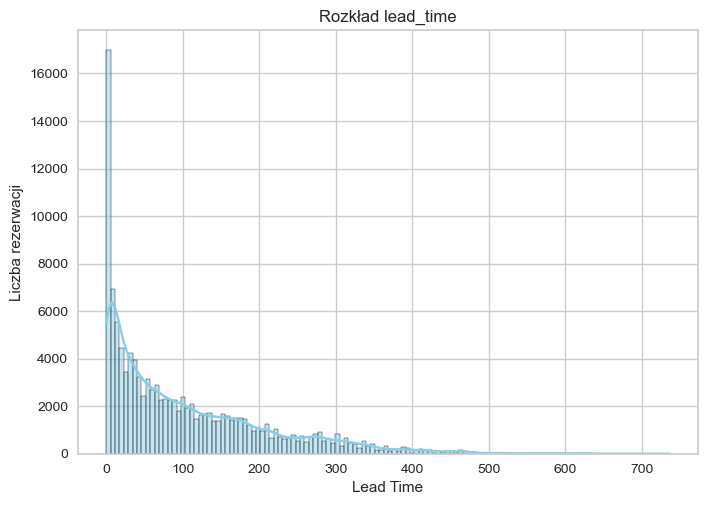

In [ ]:
sns.histplot(dane['lead_time'], kde=True, color='skyblue')
plt.title("Rozkład lead_time")
plt.xlabel("Lead Time")
plt.ylabel("Liczba rezerwacji")
plt.show()

Wykres powyżej przedstawia rozkład zmiennej lead_time, która wskazuje czas (w dniach) pomiędzy dokonaniem rezerwacji a datą przyjazdu gościa.
Wartości na osi x reprezentują długości oczekiwania na przyjazd, a wysokość słupków pokazuje, jak często dany czas oczekiwania występuje w zbiorze danych. Możemy zauważyć, że znacząca liczba gości rezerwuje pokój do 10 dni (pierwszy słupek) przed planowaną datą przyjazdu oraz, że wraz ze wzrostem czasu od rezerwacji do przyjazdu maleje liczba osób dokonująca tych rezerwacji. W dalszej części analizy ze względu na cel predykcyjne będzie można przyjrzeć się sytuacji gdy ktoś wprowadza się od razu w dniu rezerwacji szczególnie gdy rezerwacji dokonuje bezpośrednio w hotelu, ponieważ może to nie nieść znaczącej dla nas informacji.

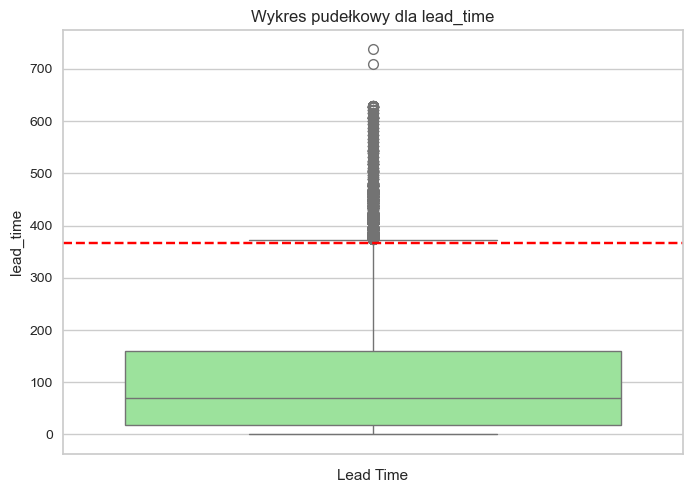

In [ ]:
sns.boxplot(y=dane['lead_time'], color='lightgreen', )
plt.axhline(y=366, color='red', linestyle='--')
plt.title("Wykres pudełkowy dla lead_time")
plt.xlabel("Lead Time")
plt.show()

Wykres powyżej ponownie przedstawia rozkład zmiennej lead_time. Czerwoną przerywaną linią zaznaczony jest czas poprzedzający przyjazd równy 366 dni ( ze względu na to, że rok 2016 był przestępny). Zauważmy, że linia ta niemal, że pokrywa końcówkę wąsa odpowiadającą wartości maksymalnej, która nie jest odstająca. Może to oznaczać, że nietypowym zachowaniem jest rezerwacja hotelu na dłużej niż rok przed przyjazdem. Możemy również zauważyć, że połowa rezerwacji odbywa się na około 2 miesiące przed przyjazdem.

In [ ]:
dane['lead_time'].isna().sum()

0

W zmiennej lead_time nie mamy braków danych

##### is_canceled

Teraz przyjrzymy się zmiennej, którą będziemy predyktować. Zaczniemy od sprawdzenia typu zmiennej, liczność klas oraz sprawdzeniu czy występują braki danych.

In [ ]:
dane['is_canceled'].dtypes

dtype('int64')

In [ ]:
print(dane['is_canceled'].value_counts())

is_canceled
0    75166
1    44224
Name: count, dtype: int64


Zmienna jest typu int64 oraz jest w miarę zrównoważona.

Wizualizacje

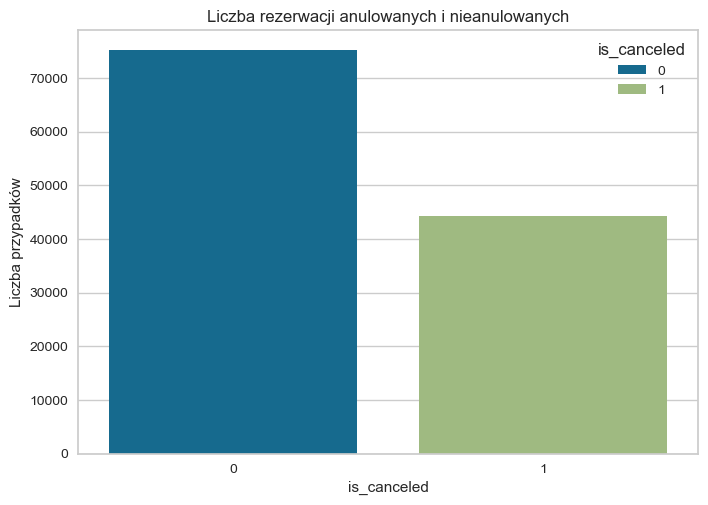

In [ ]:
sns.countplot(x='is_canceled', data=dane, hue='is_canceled')
plt.title('Liczba rezerwacji anulowanych i nieanulowanych')
plt.xlabel('is_canceled')
plt.ylabel('Liczba przypadków')
plt.show()

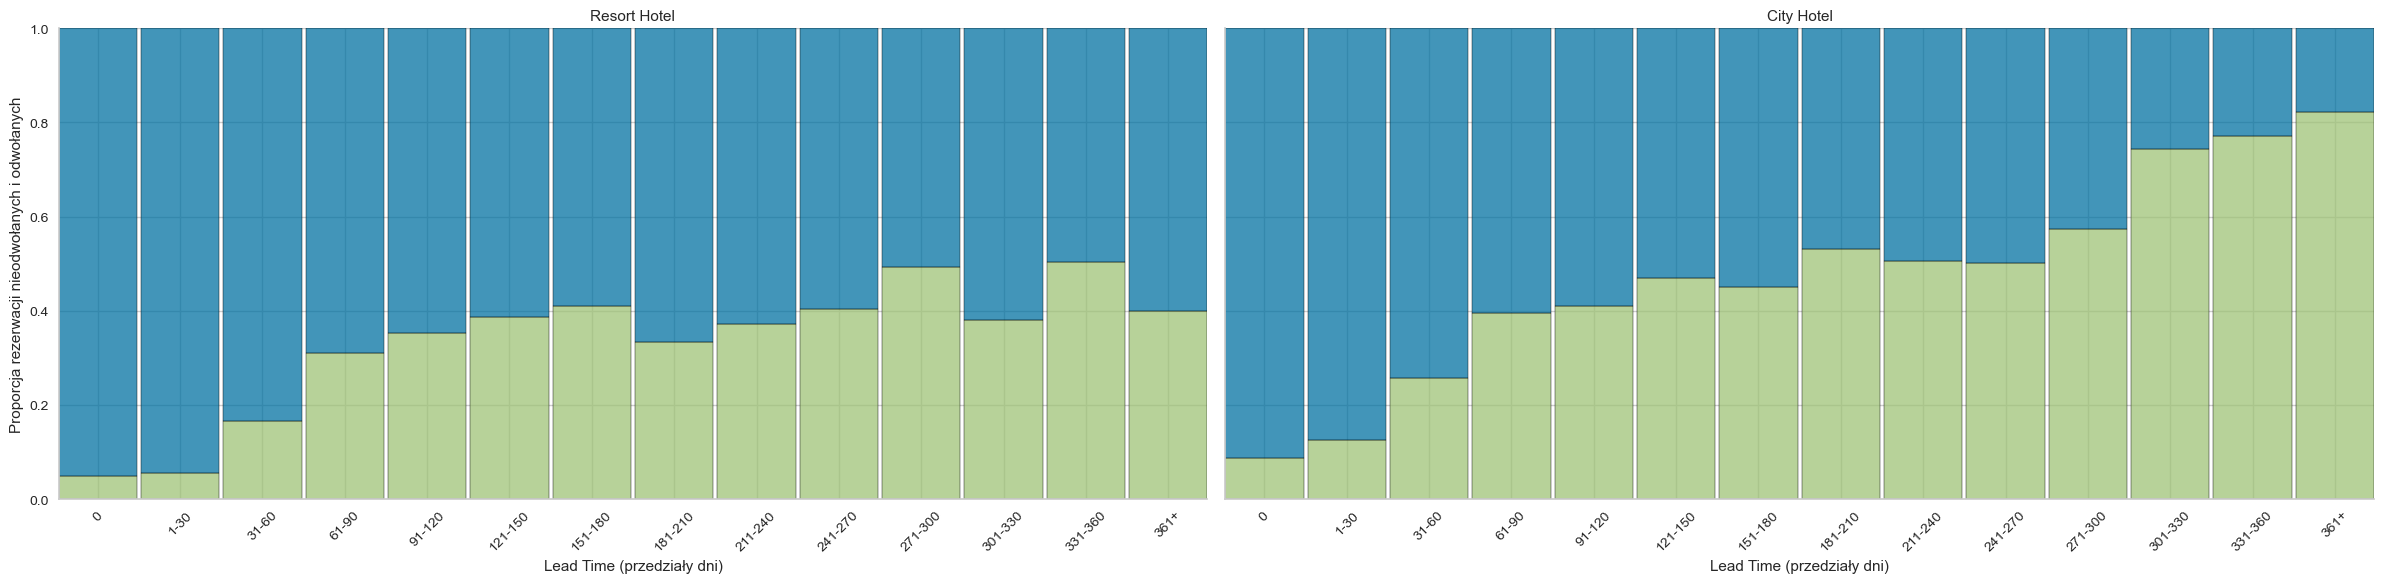

In [ ]:
bins = [-1, 0] + list(range(1, 366, 30))
labels = ['0'] + [f'{i}-{i+29}' for i in range(1, 336, 30)] + ['361+']

g = sns.FacetGrid(dane, col='hotel', height=6, aspect=2, col_wrap=2)
g.map_dataframe(
    sns.histplot,
    x=pd.cut(dane['lead_time'], bins=bins, labels=labels, include_lowest=True),
    hue='is_canceled',
    multiple='fill',
    stat='probability',
    shrink=0.95,
)

g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Lead Time (przedziały dni)", "Proporcja rezerwacji nieodwołanych i odwołanych")
plt.tight_layout()
plt.show()

Powyższe wykresy przedstawiają jak w zależności od hotelu wyglądają proporcję anulowania (anulowanie kolorem jasnozielonym, nieanulowanie kolorem niebieskim) w okresach 30 dniowych. Wydzielone zostało również 0, ze względu na to, że często mogłobyć to bezpośrednie wprowadzenie do hotelu. W przypadku obu hoteli jeśli rezerwacja odbyła się na od 1 do 30 dni to w przypadku hotelu w mieście tylko 15% rezerwacji została anulowana a jeśli ktoś wprowadzał się w dniu rezerwacji to anulowane było raptem 10% rezerwacji. W przypadku hotelu wypoczynkowego sytuacja jest nawet lepsza bo dla okresu od dnia 0 do 30 anulowanych jest tylko około 5% rezerwacji. Jeśli rezerwacja odbyła się na więcej dni przed przyjazdem to w obu przypadkach proporcja anulowanchy rezerwacji się zwiększa. W przypadku hotelu wypoczynkowego oscyluje wokół 40% zaś w przypadku hotelu w mieście rośnie bez przerwy osiągając około 80% dla dni 361+. Może być to jednak spowodowane małą ilością danych dla, których lead_time był aż tak wysoki.

In [ ]:
dane['is_canceled'].isna().sum()

0

W zmiennej is_canceled nie mamy braków danych.

##### arrival_date_year, arrival_date_month, arrival_date_day_of_month, arrival_date_week_number

Przyjrzymy się teraz kolumnom, które dotyczą daty przyjazdu gości. Będziemy patrzyli na wszystkie, ponieważ są one ze sobą powiązane i nie ma sensu patrzeć tylko na jedną z osobna. Zaczniemy od ustalenia typu zmienncyh, obliczenia ich statystyk opisowych oraz sprawdzeniu czy w tych kolumnach są jakieśc wartości brakujące.

In [ ]:
dane_eda[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].dtypes

arrival_date_year             int64
arrival_date_month           object
arrival_date_day_of_month     int64
dtype: object

Jak widać powyżej, kolumny z rokiem i dniem miesiąca są typu int64, a kolumna z miesiącem jest typu object, dlatego, że zawiera nazwy miesięcy. Jednak na potzreby wizualizacji i porównania lat oraz miesięcy w swoich odpowiednich kategoriach, zamienię te kolumny na typ category (tylko na czas EDA). Dzień miesiąca zostaje jako int64.

In [ ]:
dane_eda['arrival_date_year'] = dane_eda['arrival_date_year'].astype('category')
dane_eda['arrival_date_month'] = dane_eda['arrival_date_month'].astype('category')

dane_eda[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].describe(include = ['category', 'int64'])

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
count,119390.0,119390,119390.000000
unique,3.0,12,NaN
top,2016.0,August,NaN
freq,56707.0,13877,NaN
mean,NaN,NaN,15.798241
std,NaN,NaN,8.780829
min,NaN,NaN,1.000000
25%,NaN,NaN,8.000000
50%,NaN,NaN,16.000000
75%,NaN,NaN,23.000000


Zmienna arrival_date_year składa się z 3 lat, z czego najwięcej rezerwacji dotyczy roku 2016. Zmienna arrival_date_month składa się z 12 miesięcy, z czego najwięcej rezerwacji dotyczy sierpnia. Za to zmienna arrival_date_day_of_month jest w przedziale od 1 do 31, co jest zgodne z kalendarzem, mediana dnia miesiąca wynosi 16.
Przyjrzymy się teraz bliżej rozkładom tych zmiennych, aby zobaczyć jak zmienia się liczność rezerwacji w poszczególnych latach, miesiącach i dniach.

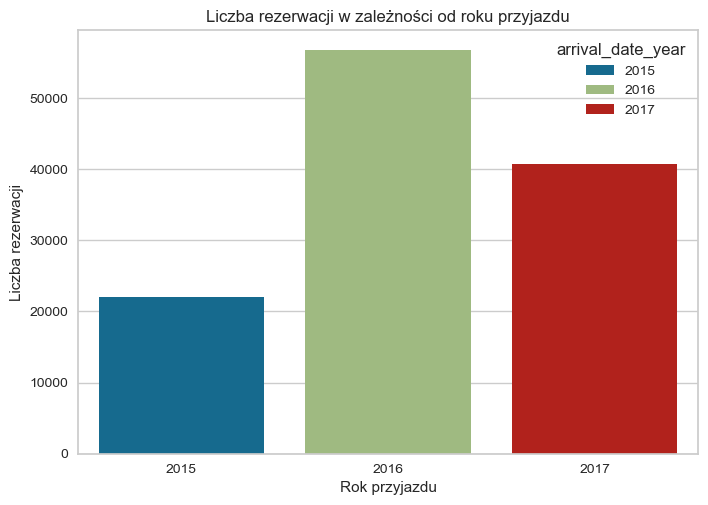

In [ ]:
w1 = sns.countplot(data = dane_eda, x = 'arrival_date_year', hue = 'arrival_date_year')
w1.set_title('Liczba rezerwacji w zależności od roku przyjazdu')
w1.set_xlabel('Rok przyjazdu')  
w1.set_ylabel('Liczba rezerwacji')
plt.show()

Z powyższego wykresu da się co nieco wywnioskować, widać, że z 2015 mamy najmniej rezerwacji, a z 2016 najwięcej. Różnice są spore, jednak stoi za tym fakt, że mamy dane tylko dla części 2015 i 2017 roku, w przeciwieństwie do 2016 roku. Należy mieć to w pamięci patrząc na liczności rezerwacji dla konkretnych miesięcy, ponieważ część miesięcy wystąpiła trzy raz, a część tylko dwa. Lepiej widać to na poniższym wykresie.

In [ ]:
dane_eda['arrival_date'] = dane_eda['arrival_date_year'].astype(str) + '-' + dane_eda['arrival_date_month'].astype(str) + '-' + dane_eda['arrival_date_day_of_month'].astype(str)
dane_eda['arrival_date'] = pd.to_datetime(dane_eda['arrival_date'])

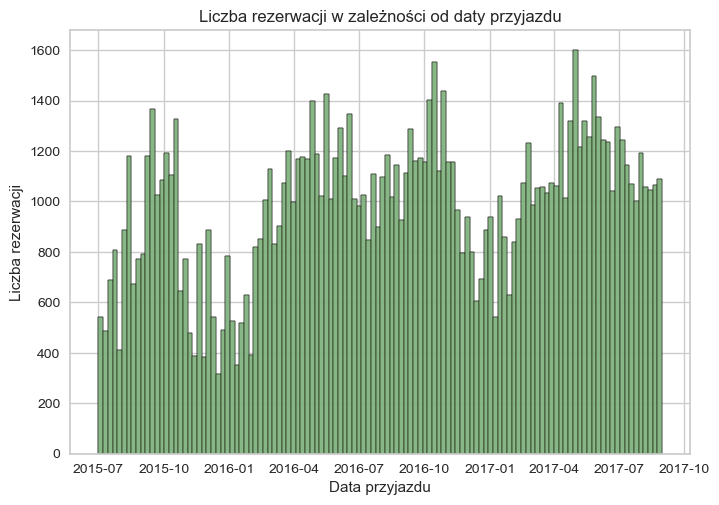

In [ ]:
w = sns.histplot(data = dane_eda, x = 'arrival_date', bins = 120)
w.set_title('Liczba rezerwacji w zależności od daty przyjazdu')
w.set_ylabel('Liczba rezerwacji')
w.set_xlabel('Data przyjazdu')
plt.show()

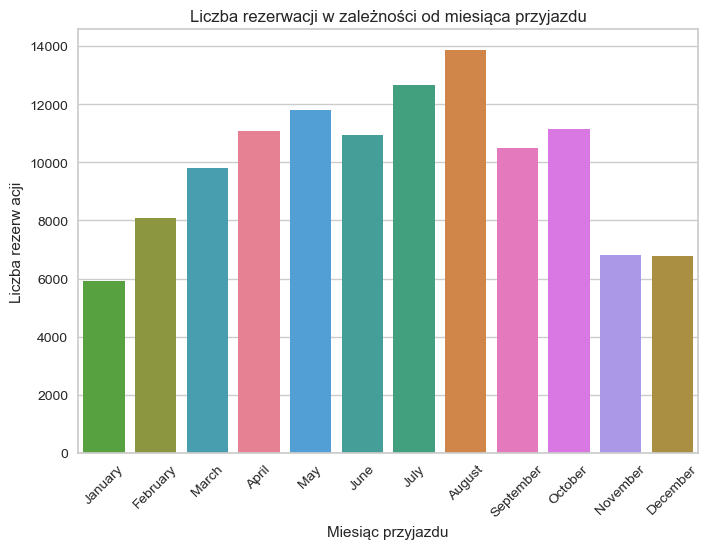

In [ ]:
w2 = sns.countplot(data = dane_eda, x = 'arrival_date_month', hue = 'arrival_date_month', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
w2.set_title('Liczba rezerwacji w zależności od miesiąca przyjazdu')
w2.set_xlabel('Miesiąc przyjazdu')
w2.set_ylabel('Liczba rezerw acji')
w2.tick_params(axis = 'x', rotation = 45)
plt.show()

Za to ten wykres pokazuje nam, że najwięcej rezerwacji jest w sierpniu, a najmniej w listopadzie. Dodatkowo widać, że w okresie wisoennym, letnim i jesiennym jest więcej rezerwacji niż w okresie zimowym (jednak należy brać poprawkę na to, że nie każdy miesiąc wsytąpił trzy razy)

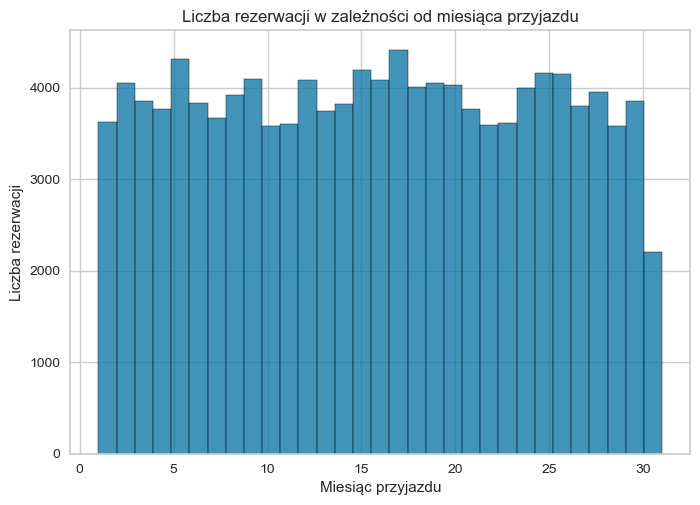

In [ ]:
w3 = sns.histplot(data = dane_eda, x = 'arrival_date_day_of_month', bins = 31)
w3.set_title('Liczba rezerwacji w zależności od miesiąca przyjazdu')
w3.set_xlabel('Miesiąc przyjazdu')
w3.set_ylabel('Liczba rezerwacji')
plt.show()

Wykres 3 pokazuje, że najmniej rezerwacji jest w ostatnim dniu miesiąca (oczywiście, bo nie każdy miesiąc ma 31 dni). Poza tym, liczba rezerwacji jest dość równomiernie rozłożona na poszczególne dni miesiąca. Można dostrzec pewne wahania, ale nie są one znaczące. Następnie przyrzymy się jak zmienia się w ciągu roku zmienia się odwoływanie rezerwacji dla obu hoteli.

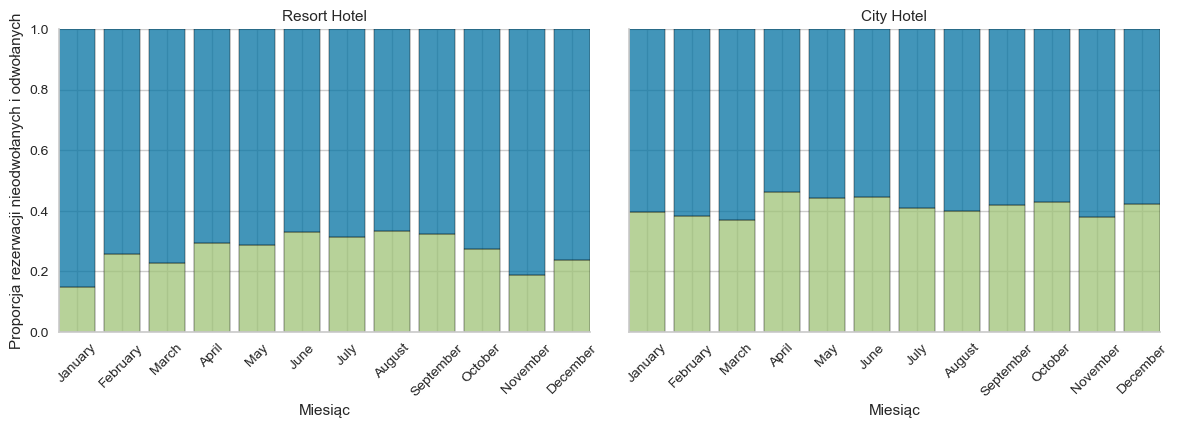

In [ ]:
arrival_date_month_cat = pd.Categorical(dane_eda['arrival_date_month'], categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered = True)
dane_eda['arrival_date_month_cat'] = arrival_date_month_cat

g = sns.FacetGrid(dane_eda, col = 'hotel', height = 4, aspect = 1.5, col_wrap = 2)
g.map_dataframe(sns.histplot, x = 'arrival_date_month_cat', hue = 'is_canceled', multiple = 'fill', stat = 'probability', shrink = 0.8)
g.set_titles(col_template = "{col_name}")
g.set_xticklabels(rotation = 45)
g.set_axis_labels("Miesiąc", "Proporcja rezerwacji nieodwołanych i odwołanych")
plt.show()

Na wykresie widać, że w hotelu wypoczynkowym jest większa proporcja rezerwacji nieodwołanych  do odwołąnych w porównaniu do hotelu miejskiego. Widoczne jest również, że w hotelu wypoczczynkowym stosunek rezerwacji odwołanych do nieodwołanych wzrasta w miesiącach letnich, najmniej rezerwacji odwołąnych jest w miesiącach zimowych. Natomiast w hotelu miejskim stosunek ten jest bardziej równomierny. Skąd może brać się taki wzrost odwołalności erzerwacji w hotelu wypoczynkowym w miesiącach letnich?
Jedną z przyczyn może cena pokoi, która może być wyższa w hotelu wypoczynkowym w miesiącach letnich. 

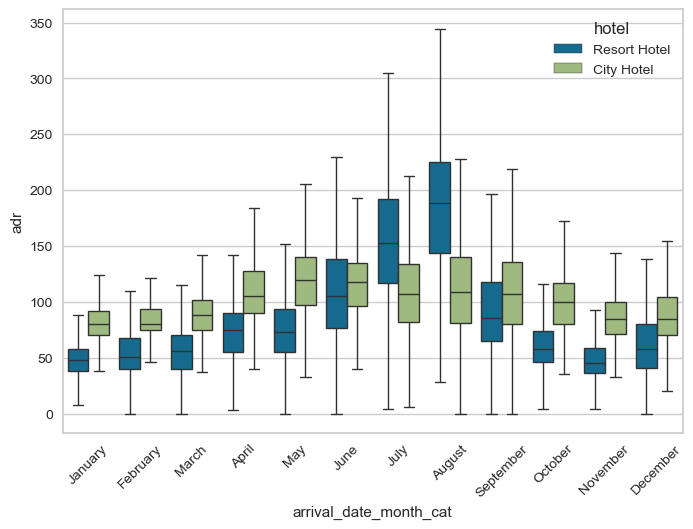

In [ ]:
sns.boxplot(data=dane_eda, x = 'arrival_date_month_cat', y = 'adr', hue = 'hotel', showfliers = False)
plt.title('Cena za noc w zależności od miesiąca przyjazdu')
plt.xticks(rotation=45)
plt.show()

Tutaj wyraźnie widać, że ceny za noc dla hotelu wypoczynkowego są o wiele wyższe w miesiącach letnich, co jest zrozumiałe, ponieważ wtedy jest sezon turystyczny. Dla hotelu miejskiego ceny są bardziej wyrównane, ale również widać, że w miesiącach letnich są wyższe. Warto zauważyć również, że w miesiącach letnich ceny za noc dla hotelu wypoczynkowego są wyższe niż dla hotelu miejskiego, jednak przez resztę roku to hotel miejski ma wyższe ceny.
Zmienna adr może mocno wpływać na to, czy rezerwacja zostanie odwołana, ponieważ jeśli cena za noc jest zbyt wysoka, to klienci mogą zrezygnować z rezerwacji.

##### stays_in_weekend_nights, stays_in_week_nights

Tak jak w poprzednim przypadku rozważę te zmienne razem, ponieważ są one ze sobą powiązane. Zaczniemmy naturalnie od ustalenia typu zmiennych, wyliczenia statystyk oraz sprawdzenia czy nie występują braki danych w tych kolumnach.

In [ ]:
dane_eda[['stays_in_weekend_nights', 'stays_in_week_nights']].dtypes

stays_in_weekend_nights    int64
stays_in_week_nights       int64
dtype: object

Obie zmienna są typu int64, więc nie trzeba ich konwertować, ponieważ jak najbardziej pasują do swojego typu.

In [ ]:
dane_eda[['stays_in_weekend_nights', 'stays_in_week_nights']].describe()

,stays_in_weekend_nights,stays_in_week_nights
count,119390.000000,119390.000000
mean,0.927599,2.500302
std,0.998613,1.908286
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,19.000000,50.000000


Można zauważyć tu kilka ciekawych rzeczy: 
- Wartości maksymalnae dla liczby noclegów w weekend i na tygodniu są równa odpowiednio 19 i 50. Są to dość duże wartości. Prawdopodbnie mamy do czynienia z sytuacjami w których osoby przebywały wiele tygodni w hotelu. Są to oczywiście outlieary, jednak nie będziemy ich usuwać.
- Wartości minimalne równe 0, oznaczają, że ktoś przebywał w hotelu jednynie na tygodniu albo na weekendzie.

Teraz sprawdźmy czy są jakieś braki danych w tych kolumnach.

In [ ]:
dane_eda[['stays_in_weekend_nights', 'stays_in_week_nights']].isna().sum()

stays_in_weekend_nights    0
stays_in_week_nights       0
dtype: int64

Nie ma żadnych braków danych w kolumnach stays_in_weekend_nights i stays_in_week_nights. Po tym krótkim przeglądzie danych, przejdziemy do wizualizacji tych zmiennych. Jednak dalej nie będziemy rozważać tych kolumn osobno, ale zsumujemy je w jedną kolumnę stays_total_nights i na jej podstawie zbadamy zależności z innymi zmiennymi.

In [ ]:
dane_eda['total_nights'] = dane_eda['stays_in_weekend_nights'] + dane_eda['stays_in_week_nights']

Odpowiemy teraz na pytanie jak długo goście przebywają w hotelach w zależności od tego czy rezerwacja została odwołana czy nie. Może to być przydatne dla hotelu, aby wiedzieć jak długo goście zazwyczaj zostają w hotelu, aby móc lepiej zarządzać pokojami oraz zobaczyć, czy goście, którzy planują zostają dłużej, są bardziej skłonni do odwołania rezerwacji. Na początej jednak przyjrzyjmy się jeszcze zmiennej total_nights.

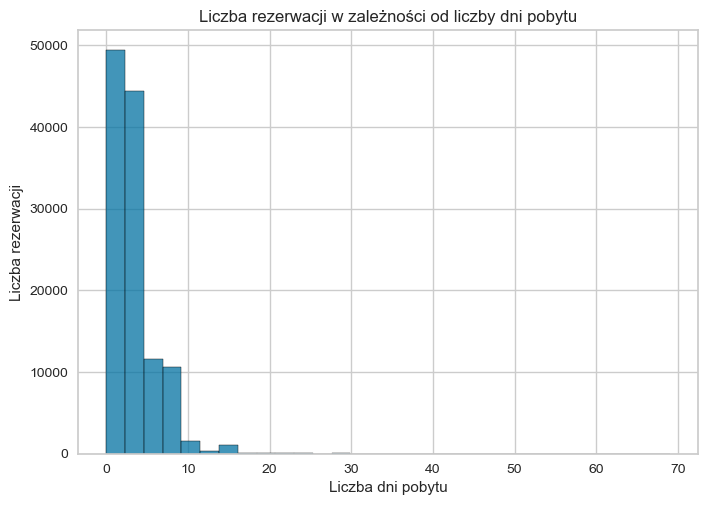

In [ ]:
sns.histplot(data = dane_eda, x = 'total_nights', bins = 30)
plt.title('Liczba rezerwacji w zależności od liczby dni pobytu')
plt.xlabel('Liczba dni pobytu')
plt.ylabel('Liczba rezerwacji')
plt.show()

In [ ]:
dane_eda['total_nights'].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64

Jest tu kilka ciekawych rzeczy na które trzeba zwrócić uwagę:
- mediana liczby nocy spędzonych w hotelu wynosi 3, co oznacza, że większość rezerwacji to krótkie pobyty
- wartość maksymalna jest całkiem duża, jednak nie ma się tym co martwić, bo jest to wartość odstająca jak i wiele innyvh wartości odstających
- wartość minimalna wynosi 0, co jest dość dziwne, bo nie ma możliwości zarezerwowania pokoju na 0 nocy

W związku z tym, że wartość minimalna jest równa 0, będzie trzeba sprawdzić o co chodzi z tymi rezerwacjami. Czy jest to błąd w danych, czy może jest to jakaś specyficzna sytuacja.

In [ ]:
pd.set_option('display.max_columns', None)

zero_nights = dane_eda[dane_eda['total_nights'] == 0]
print(f'Liczba przypadków, gdzie total_nights wynosi 0: {zero_nights.shape[0]}')


zero_nights.head()

Liczba przypadków, gdzie total_nights wynosi 0: 715


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_date_month_cat,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,July,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,July,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06,2015-07-06,July,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06,2015-07-06,July,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07,2015-07-07,July,0


Jak widać jest tych przypadków niewiele. Możliwe jest, że ktoś spędził w hotelu tylko kilka/kilkanaście godzin. Jednakże, nie możemy być pewni, że to o to chodziło, więc usuniemy te dane. Następnie zobaczymy czy liczba nocy w hotelu ma jakiś związek z odwołaniem rezerwacji.

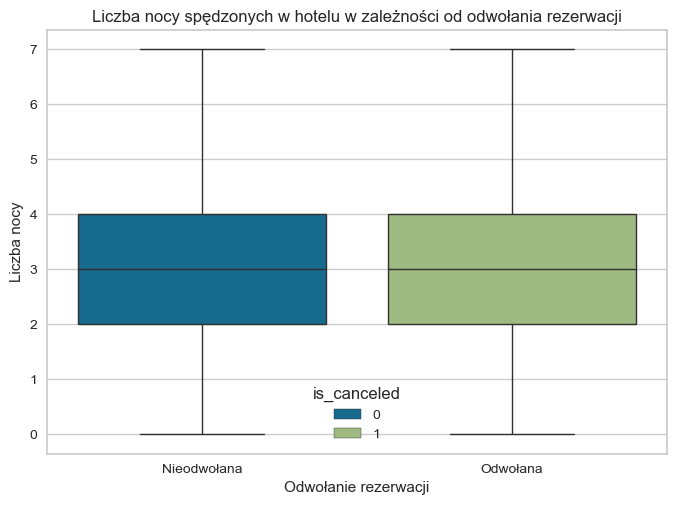

In [ ]:
sns.boxplot(data = dane_eda, x = 'is_canceled', y = 'total_nights', hue = 'is_canceled', showfliers = False)
plt.title('Liczba nocy spędzonych w hotelu w zależności od odwołania rezerwacji')
plt.xlabel('Odwołanie rezerwacji')
plt.ylabel('Liczba nocy')
plt.xticks([0, 1], ['Nieodwołana', 'Odwołana'])
plt.show()

Co ciekawe dla obu przypadków liczba nocy spędzonych w hotelu jest identyczna. Teraz zobaczymy jak liczba nocy w hotelu zależy od samego hotelu.

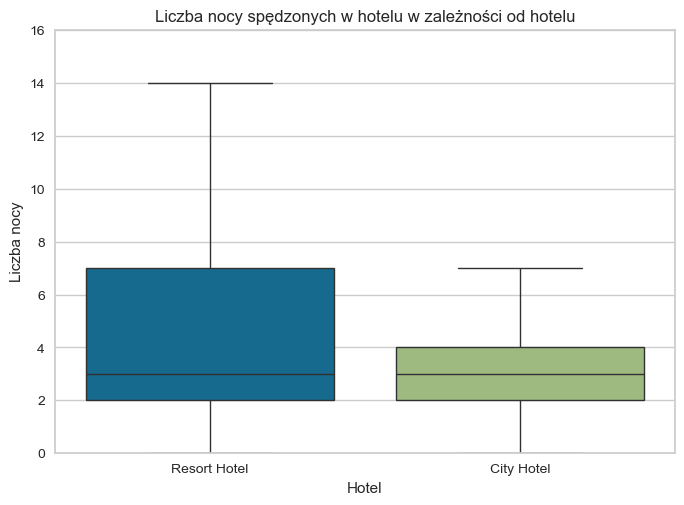

In [ ]:
sns.boxplot(data = dane_eda, x = 'hotel', y = 'total_nights', hue = 'hotel', showfliers = False)
plt.title('Liczba nocy spędzonych w hotelu w zależności od hotelu')
plt.xlabel('Hotel')
plt.ylabel('Liczba nocy') 
plt.ylim((0, 16))
plt.show()

Widać, że w przypadku hotelu City Hotel, liczba nocy spędzonych w hotelu jest zdecydowanie mniejsza niż w przypadku Resort Hotel. Zapewne wynika to z faktu, że Resort Hotel jest bardziej atrakcyjny dla turystów, którzy chcą spędzić więcej czasu na wakacjach.  W przypadku City Hotel, goście są prawdopodobnie bardziej zainteresowani krótkimi wizytami w mieście. Srawdżmy, czy ta spora różnica między hotelami zależy od pory roku.

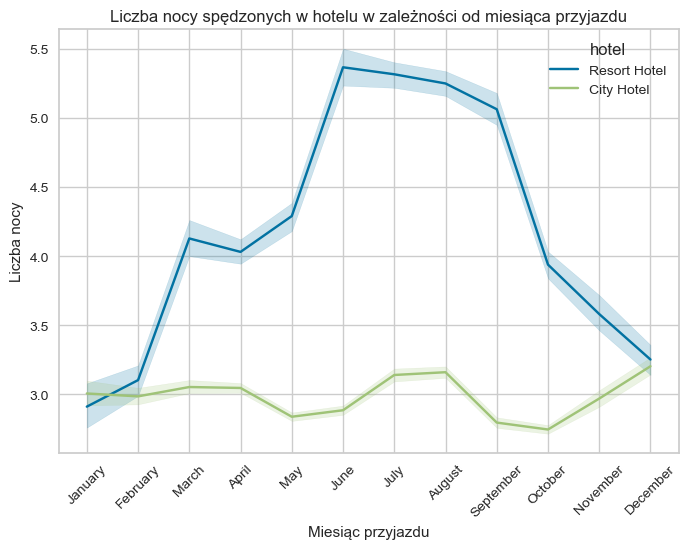

In [ ]:
sns.lineplot(data = dane_eda, x = 'arrival_date_month_cat', y = 'total_nights', hue = 'hotel')
plt.title('Liczba nocy spędzonych w hotelu w zależności od miesiąca przyjazdu')
plt.xlabel('Miesiąc przyjazdu')
plt.ylabel('Liczba nocy')
plt.xticks(rotation = 45)
plt.show()

W przypadku rezerwacji w hotelu City Hotel, liczba nocy spędzonych w hotelu jest zbliżona w każdym miesiącu, natomiast w przypadku rezerwacji w hotelu Resort Hotel, liczba nocy spędzonych w hotelu jest większa w miesiącach letnich.

Co wiąże się z obserwacją z poprzedniej części EDA, któta ukazywała, że w letnich miesiącach pobyt w hotelach jest droższy niż w pozostałych miesiącach. Łącząc te dwie obserwacje można wysnuć wniosek, że goście rezerwują dłuższe i droższe za dobe pobyty przez co może prowadzić do częstszych odwołań.

### Obsługa brakujących danych

Jak już wcześniej zauważyliśmy, w zbiorze danych występują brakujące wartości w kilku kolumnach, takich jak `children`, `country`, `agent` oraz `company`. Ponieważ niektóre algorytmy uczenia maszynowego nie radzą sobie z brakami danych, musimy podjąć odpowiednie kroki, aby się ich pozbyć. W tym celu rozważymy metody imputacji brakujących danych lub, w razie potrzeby, usuniemy wiersze zawierające braki, a nawet usuniemy kolumny jeśli zawierają naprawdę dużo braków.

Dodatkowo, zwróćmy uwagę na kolumny, które zawierają braki, aby przypisać im odpowiednie typy danych. Na przykład, kolumna children powinna mieć typ `int64`, ponieważ nie powinno być wartości zmiennoprzecinkowych w przypadku liczby dzieci.

Zaczniemy od sprawdzenia ile mamy braków danych.

In [6]:
dane.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

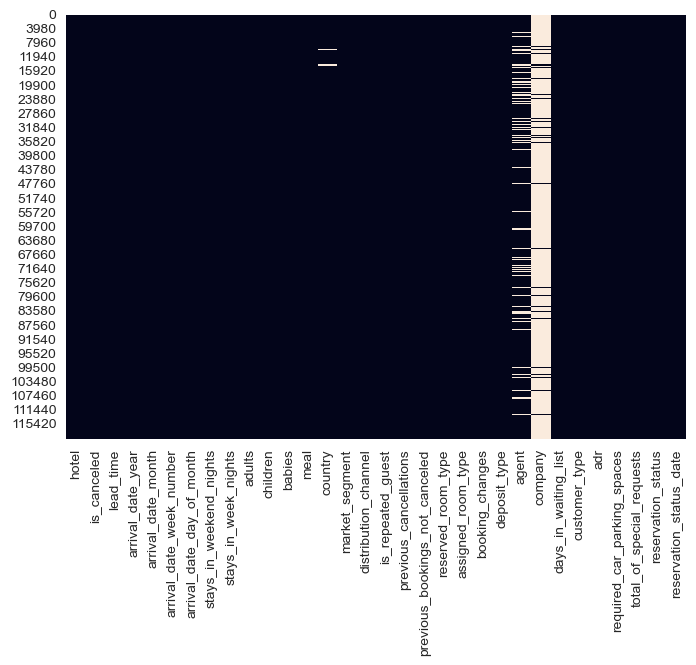

In [7]:
sns.heatmap(dane.isna(), cbar = False)
plt.show()

Widzimy, że w danych występują braki w kilku kolumnach. Największe braki dotyczą kolumny `company` (112593) potem `agent` (16340) oraz `country` (488). Kolumna `children` ma tylko 4 brakujące wartości.

Najpierw usuniemy wiersze z brakującymi danymi dla kolumny `children`. Jest ich tylko 4, więc nie ma co sobie nimi zawracać głowy. Dodatkwo ustawiamy poprawny typ zmiennej.

In [8]:
dane.dropna(subset = ['children'], inplace = True)
dane['children'] = dane['children'].astype('int64')

Podobnie postąpimy w przypadku `country`, ponieważ wciąż mamy do czynienia z niewielką ilością wierszy w porównaniu do całego zbioru.

In [9]:
dane.dropna(subset = ['country'], inplace = True)
dane['country'] = dane['country'].astype('object')

W przypadku brakujących danych w pozostałych kolumnach wstawimy wartość `None`, ponieważ `NaN` w tych kolumnach oznaczałby, że gość nie korzystał z usług agenta lub nie był wysłany z firmy. Dodatkowo, zmienimy typ tych kolumn na object, ponieważ wartości te nie mają sensu numerycznego.

In [10]:
dane.fillna({'agent': 'None', 'company': 'None'}, inplace = True)
dane[['agent', 'company']] = dane[['agent', 'company']].astype('object')

In [11]:
dane.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

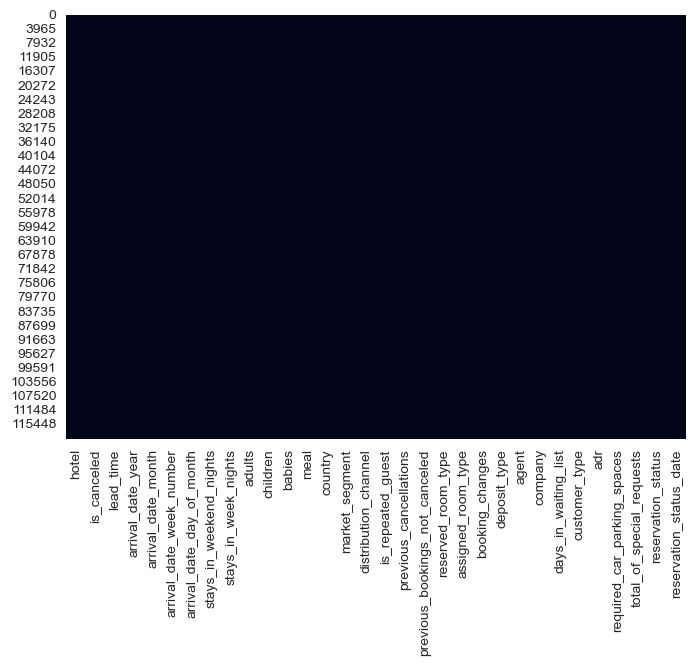

In [12]:
sns.heatmap(dane.isna(), cbar = False)
plt.show()

Usuwanie niepotrzebnych i niedozwolonych kolumn

In [13]:
dane.drop(columns = ['country', 'company', 'agent', 'reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number'], inplace = True)

In [14]:
dane.to_csv('df_bez_brakow.csv')

In [15]:
dane = pd.read_csv('df_bez_brakow.csv', index_col = 0)
dane.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,1,0,0,2,0,0,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,July,1,0,0,2,0,0,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,July,1,0,1,1,0,0,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,July,1,0,1,1,0,0,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,July,1,0,2,2,0,0,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


### Wstępne szkolenie modeli

Teraz przeprowadzimy wstępne szkolenie modeli przy użyciu biblioteki `pycaret`. Naszym celem jest porównanie wielu modeli na nieobrobionych danych i wybranie tych, które wydają się lepsze dla naszego problemu. Jesteśmy świadomi, że część modeli poradzi sobie gorzej z powodu tego, że brakuje kroków wymaganych do ich najpoprawniejszego szkolenia (a nawet poprawnego), jednak w tym momencie interesuje nas tylko jak modele poradzą sobie na podstawowych niezmienionych danych.

In [141]:
from pycaret.classification import setup
s0 = setup(data = dane, target = 'is_canceled', session_id = 123, use_gpu = True, n_jobs = -1)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

,Description,Value
0,Session id,123
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(118898, 25)"
4,Transformed data shape,"(118898, 75)"
5,Transformed train set shape,"(83228, 75)"
6,Transformed test set shape,"(35670, 75)"
7,Numeric features,15
8,Categorical features,9
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the prov

Rezygnuujemy  z `Accuracy` i wybieramy optymalizacje modelu po metryce `Precision`, ponieważ zależy nam bardziej na tym, aby nasz model poprawnie wykrywał rezerwacje odwołane przez gości.

In [ ]:
compare_models(sort = 'Precision')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:39:20
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7889,0.8434,0.5097,0.8669,0.6420,0.5062,0.5421,1.8320
rf,Random Forest Classifier,0.8638,0.0000,0.7547,0.8614,0.8045,0.7007,0.7044,5.0690
lr,Logistic Regression,0.8094,0.8609,0.6129,0.8294,0.7048,0.5687,0.5830,15.1870
dt,Decision Tree Classifier,0.8193,0.0000,0.7632,0.7534,0.7582,0.6140,0.6140,2.8310
knn,K Neighbors Classifier,0.7610,0.0000,0.6241,0.6999,0.6598,0.4766,0.4784,3.6230
svm,SVM - Linear Kernel,0.7040,0.8190,0.7142,0.6549,0.6282,0.3958,0.4406,12.0480
qda,Quadratic Discriminant Analysis,0.6095,0.7963,0.8438,0.5291,0.6102,0.2782,0.3533,2.1690
nb,Naive Bayes,0.5851,0.0000,0.8408,0.4674,0.6008,0.2362,0.2821,1.8140


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Najlepiej z zadaniem klasyfikacji radzą sobie modele oparte na drzewach decyzyjnych oraz modele działające na złożeniach słabszych mdoeli tzw. ensemble learning. Wiadomo, że przyczyną może być brak poważnego preprocessingu koniecznego dla takich modeli jak SVM czy KNN, jednak w kolejnych etapach szkolenia w przyszłości skupimy się głównie na modelach opartych na drzewach.

### Detekcja anomalii i outlierów oraz analiza wariancji i korelacji

W tej części sprawdzimy czy mamy jakieś anomalie w zbiorze.

In [16]:
from pycaret.anomaly import *
exp_ano101 = setup(dane, session_id = 123, use_gpu=True, n_jobs = -1)

,Description,Value
0,Session id,123
1,Original data shape,"(118898, 25)"
2,Transformed data shape,"(118898, 75)"
3,Numeric features,16
4,Categorical features,9
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


Skorzystamy z algorytmu IsolationForest do wykrywania anomalii.

In [17]:
iforest = create_model('iforest')

Na ten moment nie usuwamy anomalii, ponieważ mogą one zawierać wartości odstające. Ich usunięcie spowodowałoby zmianę wartości kwartylowych, co przy późniejszym wyznaczaniu wartości odstających mogłoby skutkować usunięciem większej liczby danych, niż jest to konieczne. Z tego powodu tymczasowo pozostawiamy anomalie, jednocześnie zapisując informacje o ich wystąpieniu w specjalnie stworzonej kolumnie.

In [18]:
dane = assign_model(iforest)
dane = dane.iloc[:, :-1]
dane.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Anomaly
0,Resort Hotel,0,342,July,1,0,0,2,0,0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,1
1,Resort Hotel,0,737,July,1,0,0,2,0,0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,1
2,Resort Hotel,0,7,July,1,0,1,1,0,0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,0
3,Resort Hotel,0,13,July,1,0,1,1,0,0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,0
4,Resort Hotel,0,14,July,1,0,2,2,0,0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,0


In [19]:
dane['is_canceled'] = dane['is_canceled'].astype('bool')
dane['is_repeated_guest'] = dane['is_repeated_guest'].astype('bool')
dane['Outlier'] = 0

Teraz korzystając z rozstępu międzykwartylowego wyznaczamy wartości odstające. Ich również nie usuwamy od razu, ponieważ część wartości odstających może się znajdować w kolumnie, którą później usuniemy podczas analizy wariancji. Z tego powodu tak jak przy anomaliach dodajemy kolumne, która mówi o tym czy dana obserwacja została uznana za wartość odstającą.

In [20]:
for col in dane.select_dtypes(include = [np.number]).columns[:-2]:
    Q1 = dane[col].quantile(0.25)
    Q3 = dane[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dane.loc[(dane[col] < lower_bound) | (dane[col] > upper_bound), 'Outlier'] = 1

Po zidentyfikowaniu anomalii oraz wartości odstających przeprowadzamy analizę wariancji, a potem wrócimy do ich usunięcia. Wariancję obliczymy na znormalizowanych danych, które nie zostały oznaczone ani jako anomalie ani jako outliery.

In [21]:
df = dane[(dane['Anomaly'] == 0) & (dane['Outlier'] == 0)]

W celu ujednolicenia skali normalizujemy dane, a następnie wyliczamy wariancję po czym usuwamy te kolumny, które miały najniższą wariancję.

In [22]:
df_norm = df.select_dtypes(include = [np.number]).apply(lambda col: (col - col.min()) / (col.max() - col.min()))
df_norm = pd.concat([df[df.select_dtypes(include = 'bool').columns], df_norm], axis = 1)

In [23]:
df_norm.var().sort_values(ascending = False)

is_canceled                       0.238782
total_of_special_requests         0.117740
arrival_date_day_of_month         0.087244
stays_in_week_nights              0.055707
lead_time                         0.055143
stays_in_weekend_nights           0.047880
adr                               0.028694
is_repeated_guest                 0.004445
adults                                 NaN
children                               NaN
babies                                 NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
booking_changes                        NaN
days_in_waiting_list                   NaN
required_car_parking_spaces            NaN
Anomaly                                NaN
Outlier                                NaN
dtype: float64

Widzimy sporo wartości NaN, biorą się one z faktu, że przy odejmowaniu minimum od maksimum otrzymaliśmy zero, a dzielenie przez zero daje właśnie NaN. Gdy maksimum i minimum są sobie równe to mamy do czynienia z zerową wariancją. Teraz usuniemy te kolumny ze zbioru danych. 

In [24]:
null_variance_variables = df_norm.var().sort_values()[8:].index.tolist()[:-2]
print(null_variance_variables)

['adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces']


In [25]:
dane.drop(columns = null_variance_variables, inplace = True)
dane.shape

(118898, 19)

Po tym jak usuneliśmy kolumny z zerową wariancją. Jeszcze raz wyliczymy wartości odstające. Robimy to w tej kolejności, ponieważ chcieliśmy uniknąć sytuacji w której usuwamy najpierw wartości odstające, a potem wyliczamy wariancję, bo w taki sposób najpierw zmniejszamy wariancję zmiennych, które mogły odpowiadać za dany outlier, a następnie usuwamy kolumne, która z powodu usunięcia wszystkich outlierów skończyła z bardzo małą lub zerową wariancją. Jednak nie mogliśmy na samym początku obliczyć znormalizowanych wariancji, bo byłyby one zaniżone przez bardzo duże wartości maksymalne (które to są outlierami). Dlatego postąpiliśmy w ten trochę pokrętny sposób.

In [26]:
dane['Outlier'] = 0

for col in dane.select_dtypes(include = [np.number]).columns[:-2]:
    Q1 = dane[col].quantile(0.25)
    Q3 = dane[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dane.loc[(dane[col] < lower_bound) | (dane[col] > upper_bound), 'Outlier'] = 1

Teraz usuniemy jednocześnie anomalie i obserwacje odstające. Nie usuneliśmy anomalii przed obliczeniem wartości odstających z tego samego powodu co na początku tej części.

In [27]:
dane = dane[(dane['Outlier'] == 0) & (dane['Anomaly'] == 0)]
dane.drop(columns = ['Outlier', 'Anomaly'], inplace = True)
dane.shape

(101983, 17)

Naszym kolejnym krokiem będzie przeprowadzenie analizy korelacji w celu usunięcia zmiennych objaśniających o dużej korelacji z innymi zmiennymi objaśniającymi, jednak zanim to zrobimy zamienimy sobie zmienne kategoryczne na dummies.

In [28]:
df_num = dane[dane.select_dtypes(include = [np.number, 'bool']).columns[:-2]]
df_num.head()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest
2,False,7,1,0,1,False
3,False,13,1,0,1,False
4,False,14,1,0,2,False
5,False,14,1,0,2,False
6,False,0,1,0,2,False


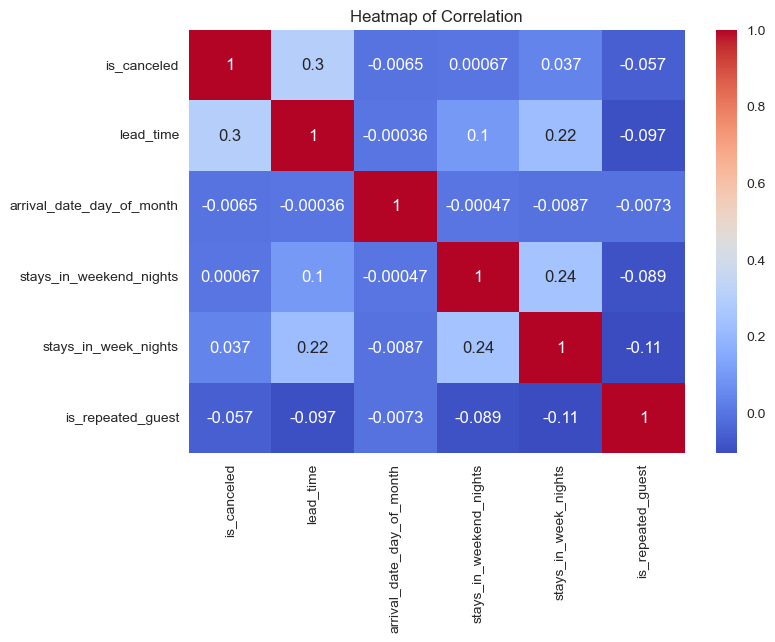

In [29]:
df_num_corr = df_num.corr()

sns.heatmap(df_num_corr, annot = True, cmap = "coolwarm", cbar = True)
plt.title("Heatmap of Correlation")
plt.show()

Zanim zapiszemy dane zamienimy kolumny kategoryczne na zmienne typu dummies .

In [30]:
dane = pd.get_dummies(dane, drop_first = True)
dane.shape

(101983, 59)

In [31]:
dane.to_csv('df_po_analizie.csv')

### Uczenie modeli

Najpierw wczytamy potrzebne funkcje, klasy oraz dane.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import make_pipeline

import pickle

In [133]:
df = pd.read_csv('df_po_analizie.csv', index_col = 0)
df.shape

(101983, 59)

Teraz podzielimy zbiór danych na treningowy i tetsowy.

In [134]:
X = df.drop(columns = 'is_canceled').values
y = df['is_canceled'].values
print(X.shape, y.shape)

(101983, 58) (101983,)


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(91784, 58) (10199, 58) (91784,) (10199,)


Teraz zajmiemy się szkoleniem modeli wraz z ich hiperparametrami. Zdecydowaliśmy się na te modele z kilku powodów jednym z nich jest prostota i dotyczy ona modeli drzewa i regresji logistycznej. Za to las losowy poradził sobie bardzo dobrze, może osiągając nienajwyższy wynik na 'precision' jednak prowadził w pozostałych metrykach.

In [136]:
names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

In [137]:
classifiers = {
    "LogisticRegression": (LogisticRegression(), {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}),
    "DecisionTreeClassifier": (DecisionTreeClassifier(), {'max_depth': [13, 15], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [2, 4, 5]}),
    "RandomForestClassifier": (RandomForestClassifier(), {'n_estimators': [300, 500], 'max_depth': [5, 9], 'min_samples_split': [30, 60], 'min_samples_leaf': [20, 25]})
}

Po wstępnym przygotowaniu modeli i ich nazw przejdziemy już do szukania najlepszych hiperparametrów. Skorzystamy z walidacji krzyżowej z 5-foldami i z równoważeniem liczebności klas w każdym foldzie dla zmiennej, którą klasyfikujemy (is_canceled)

In [ ]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

In [ ]:
best_params = []
best_models = []

for name, (clf, grid_param) in classifiers.items():
    grid_search = GridSearchCV(estimator=clf, param_grid=grid_param, cv=cv, scoring='precision', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params.append(grid_search.best_params_)
    best_models.append(grid_search.best_estimator_)
    print(f'{name}: {grid_search.best_params_}')

Po wybraniu najlepszych parametrów dla każdego z naszych modeli przechodzimy do testowania ich na zbiorze testowym.

In [ ]:
for name, model in zip(names, best_models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy for {name}: {accuracy_score(y_test, y_pred)}')
    print(f'Precision for {name}: {precision_score(y_test, y_pred)}')
    print(f'{name}:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion matrix for {name}:\n{confusion_matrix(y_test, y_pred)}')

### Redukcja wymiarów przy użyciu PCA oraz ICA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

from sklearn.preprocessing import StandardScaler

In [ ]:
df_pa = pd.read_csv('df_po_analizie.csv')
can = df_pa[['is_canceled']]
df_pa = df_pa.drop(columns=["Unnamed: 0", "is_canceled"])
df_pa = pd.get_dummies(df_pa, drop_first=True)


Standaryzacja danych

In [ ]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_pa)

#### PCA

Ustalenie progu wyjaśnianej wariancji oraz liczby komponentów.

In [ ]:
pca = PCA()

pca.fit(df_std)
variances = pca.explained_variance_ratio_

print(f'Wyjaśniona wariancja: {variances}')

zeros = (variances < 0.01).sum()
print(f'{zeros} składowych ma wyjaśnioną wariancję mniejszą niż 1%')

Wyjaśniona wariancja: [5.89642e-02 5.45163e-02 3.63615e-02 3.46227e-02 3.42694e-02 3.27200e-02
 3.23082e-02 3.15992e-02 3.06588e-02 2.89757e-02 2.61606e-02 2.53270e-02
 2.42618e-02 2.38218e-02 2.19272e-02 2.01810e-02 1.95981e-02 1.95397e-02
 1.91215e-02 1.89930e-02 1.88812e-02 1.88257e-02 1.86361e-02 1.83950e-02
 1.80791e-02 1.77172e-02 1.76049e-02 1.74236e-02 1.73471e-02 1.72348e-02
 1.71437e-02 1.68257e-02 1.67229e-02 1.62288e-02 1.52138e-02 1.49086e-02
 1.37537e-02 1.33419e-02 1.26602e-02 1.15887e-02 1.04539e-02 1.01974e-02
 9.31046e-03 8.61647e-03 6.68068e-03 5.63963e-03 4.53320e-03 4.24466e-03
 4.02570e-03 3.29605e-03 2.38028e-03 2.01901e-03 1.94969e-03 1.83977e-03
 1.35117e-03 9.56689e-04 4.49454e-05 7.81279e-30]
16 składowych ma wyjaśnioną wariancję mniejszą niż 1%


In [ ]:
np.set_printoptions(precision = 5)

cum_variances = np.cumsum(variances)
print(f'Kumulatywna wariancja: {cum_variances}')

for i, c_var in enumerate(cum_variances):
    print(f'Komponent {i + 1}: {c_var}')

Kumulatywna wariancja: [0.05896 0.11348 0.14984 0.18446 0.21873 0.25145 0.28376 0.31536 0.34602
 0.375   0.40116 0.42648 0.45075 0.47457 0.49649 0.51668 0.53627 0.55581
 0.57493 0.59393 0.61281 0.63163 0.65027 0.66867 0.68674 0.70446 0.72207
 0.73949 0.75684 0.77407 0.79122 0.80804 0.82476 0.84099 0.85621 0.87112
 0.88487 0.89821 0.91087 0.92246 0.93291 0.94311 0.95242 0.96104 0.96772
 0.97336 0.97789 0.98214 0.98616 0.98946 0.99184 0.99386 0.99581 0.99765
 0.999   0.99996 1.      1.     ]
Komponent 1: 0.05896416511900946
Komponent 2: 0.1134804901390492
Komponent 3: 0.14984203886884048
Komponent 4: 0.18446471013760662
Komponent 5: 0.2187340802722315
Komponent 6: 0.25145408261695174
Komponent 7: 0.28376232287742015
Komponent 8: 0.3153614890262799
Komponent 9: 0.3460202619923394
Komponent 10: 0.3749959172370999
Komponent 11: 0.40115653757552344
Komponent 12: 0.4264835070380962
Komponent 13: 0.45074534358168444
Komponent 14: 0.47456719177092666
Komponent 15: 0.4964944292061202
Komponent 1

Patrzać na wyniki PCA widzimy, że 43 komponenty wyjaśniają więcej niż 95% wariancji, więc tyle komponentów wybierzemy

In [ ]:
n_pca_095 = (cum_variances < 0.95).sum() + 1
print(f'Liczba wymiarów dla wyjaśnianej wariancji na poziomie powyżej 95%: {n_pca_095}')

Liczba wymiarów dla wyjaśnianej wariancji na poziomie powyżej 95%: 43


In [ ]:
n_pca_090 = (cum_variances < 0.9).sum() + 1
print(f'Liczba wymiarów dla wyjaśnianej wariancji na poziomie powyżej 90%: {n_pca_090}')

Liczba wymiarów dla wyjaśnianej wariancji na poziomie powyżej 90%: 39


In [ ]:
n_pca_080 = (cum_variances < 0.8).sum() + 1
print(f'Liczba wymiarów dla wyjaśnianej wariancji na poziomie powyżej 80%: {n_pca_080}')

Liczba wymiarów dla wyjaśnianej wariancji na poziomie powyżej 80%: 32


In [ ]:
pca_095 = PCA(n_components = n_pca_095)

pca_095.fit(df_std)
df_pca_095 = pca_095.transform(df_std)

print(f'Wymiary zbioru danych przed PCA: {df_pa.shape}')
print(f'Wymiary zbioru danych po PCA: {df_pca_095.shape}')

Wymiary zbioru danych przed PCA: (101983, 58)
Wymiary zbioru danych po PCA: (101983, 43)


In [ ]:
df_pca = pd.DataFrame(df_pca_095)
df_pca = pd.concat([can,df_pca], axis=1)

In [ ]:
df_pca.to_csv('df_pca.csv', index=False)

#### ICA

In [ ]:
ica_43 = FastICA(n_components = n_pca_095)

ica_43.fit(df_std)
df_ica_43 = ica_43.transform(df_std)

print(f'Wymiary zbioru danych przed ICA: {df_pa.shape}')
print(f'Wymiary zbioru danych po ICA: {df_ica_43.shape}')

Wymiary zbioru danych przed ICA: (101983, 58)
Wymiary zbioru danych po ICA: (101983, 43)


In [ ]:
df_ica = pd.DataFrame(df_ica_43)
df_ica = pd.concat([can,df_ica], axis=1)

In [ ]:
df_ica.to_csv('df_ica.csv', index=False)

### Modele po redukcji wymiarów

In [2]:
df_pca_095 = pd.read_csv("df_pca.csv")

NameError: name 'pd' is not defined

In [12]:
X = df_pca_095.drop(columns = 'is_canceled').values
y = df_pca_095['is_canceled'].values
print(X.shape, y.shape)

(101983, 43) (101983,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(91784, 43) (10199, 43) (91784,) (10199,)


Walidacja krzyżowa

In [14]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

Hiperparamrtry modeli

In [15]:
names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

In [16]:
classifiers = {
    "LogisticRegression": (LogisticRegression(), {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}),
    "DecisionTreeClassifier": (DecisionTreeClassifier(), {'max_depth': [13, 15], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [2, 4, 5]}),
    "RandomForestClassifier": (RandomForestClassifier(), {'n_estimators': [300, 500], 'max_depth': [5, 9], 'min_samples_split': [30, 60], 'min_samples_leaf': [20, 25]})
}

Szuaknie najlepszych hiperparametrów dla modeli

In [1]:
best_params = []
best_models = []

for name, (clf, grid_param) in classifiers.items():
    grid_search = GridSearchCV(estimator=clf, param_grid=grid_param, cv=cv, scoring='precision', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params.append(grid_search.best_params_)
    best_models.append(grid_search.best_estimator_)
    print(f'{name}: {grid_search.best_params_}')
    

NameError: name 'classifiers' is not defined

Testowanie najlepszych modeli

In [ ]:
for name, model in zip(names, best_models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy for {name}: {accuracy_score(y_test, y_pred)}')
    print(f'Precision for {name}: {precision_score(y_test, y_pred)}')
    print(f'{name}:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion matrix for {name}:\n{confusion_matrix(y_test, y_pred)}')